# CG Travel Diagram

This section determines CG position for various loading scenarios for the example airplane. These positions are also plotted to visualize how the CG moves. Following table summarizes the weight and corresponding CG location for the components from previous section, along with fuel and payload. It is assumed that CG for the payload will be same as the fuselage CG, while CG of the fuel will be same as the wing CG. Refer to lecture notes and Roskam Chapter 10 for more details.

<div style="width:60%; margin: auto;">

Component | Weight (lbs) | Moment arm (ft)
 --- | :----: | :---:
Wing | 344 | 15.6
Fuselage | 367 | 15.7
Horizontal tail | 42 | 32.4
Vertical tail | 39 | 32.7
Main LG | 78 | 16.1
Nose LG | 26 | 7.4
Propulsion system | 1663 | 12.2
Miscellaneous | 555 | 15.7
Fuel | 1060 | 15.6
Payload (including pilot) | 1200 | 15.7
</div>

Above table will be used for computing the CG in four scenarios:

1. Airplane with no fuel and payload (empty weight)
2. Airplane with fuel only
3. Airplane with fuel and payload (maximum takeoff weight)
4. Airplane with payload only

Below block computes CG location for above scenarios:

In [26]:
import numpy as np

# Weight and CG
W_wing, CG_wing = 344, 15.6
W_fuselage, CG_fuselage = 367, 15.7
W_ht, CG_ht = 42, 32.4
W_vt, CG_vt = 39, 32.7
W_mlg, CG_mlg = 78, 16.1
W_nlg, CG_nlg = 26, 7.4
W_prop, CG_prop = 1663, 12.2
W_misc, CG_misc = 555, 15.7
W_fuel, CG_fuel = 1060, 15.6
W_pay, CG_pay = 1200, 16.0

weights = np.array([W_wing, W_fuselage, W_ht, W_vt, W_mlg, W_nlg,W_prop, W_misc, W_fuel, W_pay])

CGs = np.array([CG_wing, CG_fuselage, CG_ht, CG_vt, CG_mlg, CG_nlg,CG_prop, CG_misc, CG_fuel, CG_pay])

# CG with no fuel and payload
W_empty = np.sum(weights[:-2])
xcg_empty = np.sum(weights[:-2]*CGs[:-2]) / W_empty
print(f"CG with no fuel and payload: {xcg_empty:.2f}")

# CG with fuel only
W_fuel_only = np.sum(weights[:-1])
xcg_fuel_only = np.sum(weights[:-1]*CGs[:-1]) / W_fuel_only
print(f"CG with fuel only: {xcg_fuel_only:.2f}")

# CG with payload only
W_pay_only = np.sum(weights[:-2]) + weights[-1]
xcg_pay_only = (np.sum(weights[:-2]*CGs[:-2]) + weights[-1]*CGs[-1]) / W_pay_only
print(f"CG with payload only: {xcg_pay_only:.2f}")

# CG with fuel and payload
W_max = np.sum(weights)
xcg_max = np.sum(weights*CGs) / W_max
print(f"CG with no fuel and payload: {xcg_max:.2f}")

CG with no fuel and payload: 14.20
CG with fuel only: 14.55
CG with payload only: 14.70
CG with no fuel and payload: 14.88


Using above CG locations, below code block plots CG travel diagram to visualize how CG moves:

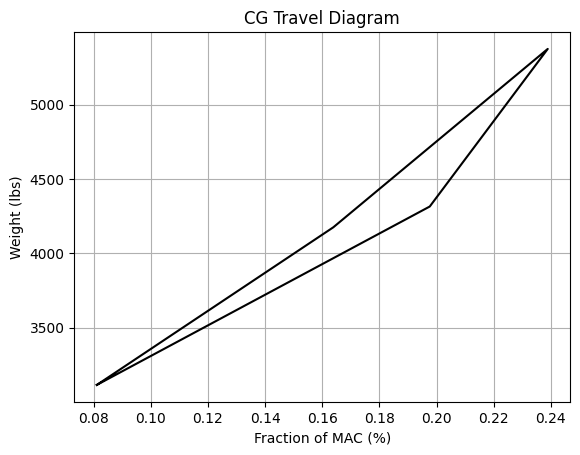

In [27]:
import matplotlib.pyplot as plt

xLE_mac = 13.85 # ft
mac = 4.3 # ft

xcg_empty_mac = (xcg_empty-xLE_mac)/mac
xcg_fuel_only_mac = (xcg_fuel_only-xLE_mac)/mac
xcg_pay_only_mac = (xcg_pay_only-xLE_mac)/mac
xcg_max_mac = (xcg_max-xLE_mac)/mac

# Seqeunce of loading
xcg_mac = [xcg_empty_mac, xcg_fuel_only_mac, xcg_max_mac, xcg_pay_only_mac, xcg_empty_mac]
W = [W_empty, W_fuel_only, W_max, W_pay_only, W_empty]

fig, ax = plt.subplots()
ax.plot(xcg_mac, W, "k-", markersize=10)
ax.set_xlabel("Fraction of MAC (%)")
ax.set_ylabel("Weight (lbs)")
ax.set_title("CG Travel Diagram")
# ax.annotate()
ax.grid()